In [9]:
from envs.citysim import CitySim
from agents.test_agents import RandomAgent

import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path

%load_ext autoreload
%autoreload 2

In [10]:
def sum_ambs_in_config(config):
    s=0
    for key, item in config.items():
        s+=item["available_amb"]
    return s

In [11]:
project_root = Path(os.getcwd()).parent

In [12]:
city = CitySim(
    time_step=300,
    city_config=project_root/"data/city_defaults.yaml",
    city_geometry=project_root/"data/madrid_districts_processed/madrid_districts_processed.shp",
)
sum_ambs_in_config(city.config["hospitals"])

90

In [13]:
agent = RandomAgent(n_hospitals=len(city.hospitals)-1, n_severity_levels=city.severity_levels)

In [58]:
%%time

iterations = 100

obs = city.reset()
print(obs)
total_reward = 0

ambs_record = [np.sum(obs[0][:, 4])]
emergency_record = [obs[1][:,:,0].sum()]
rewards = []
for i in range(iterations):
    action = agent(obs)
    obs, reward, done, info = city.step(action)
    active_emergencies = obs[1][:,:,0].sum()
    total_reward += reward
    ambs_record.append(np.sum(obs[0][:, 4]))
    emergency_record.append(active_emergencies)
    rewards.append(reward)

[array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 1.0000000e+00, -3.8478310e+00, -2.7646100e+00,  1.0000000e+01,
         4.0000000e+00,  0.0000000e+00],
       [ 2.0000000e+00, -1.5937450e+00,  2.9369810e+00,  9.0000000e+00,
         1.1000000e+01,  0.0000000e+00],
       [ 3.0000000e+00, -1.5961150e+00,  2.7182360e+00,  9.0000000e+00,
         1.4000000e+01,  0.0000000e+00],
       [ 4.0000000e+00,  1.4707200e-01, -4.2712440e+00,  1.2000000e+01,
         1.3000000e+01,  0.0000000e+00],
       [ 5.0000000e+00,  7.8709300e-01,  1.3054273e+01,  8.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 6.0000000e+00,  2.5903110e+00,  5.2267400e-01,  4.0000000e+00,
         1.5000000e+01,  0.0000000e+00],
       [ 7.0000000e+00,  7.0352360e+00, -3.1054590e+00,  1.8000000e+01,
         5.0000000e+00,  0.0000000e+00],
       [ 8.0000000e+00,  1.1308530e+00,  7.4158478e+00,  8.0000000e+00,
         1.1000000e+01,

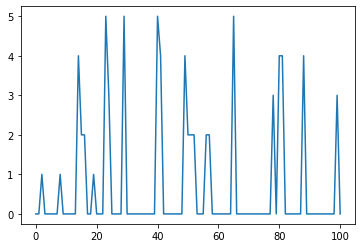

In [59]:
plt.plot(np.array(emergency_record))
plt.show()

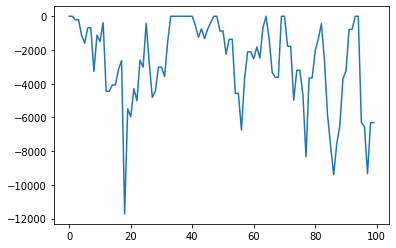

In [60]:
plt.plot(np.array(rewards))